In [1]:
# Importing libraries
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

C:\Users\Sai charan\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
C:\Users\Sai charan\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
con1 = sqlite3.connect('final.sqlite')

# Eliminating neutral reviews i.e. those reviews with Score = 3
filtered_data = pd.read_sql_query(" SELECT * FROM Reviews ", con1)
print(filtered_data.shape)
filtered_data.head()

(364171, 12)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [3]:
#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
print(final.shape)

#Checking to see how much % of data still remains
((final.shape[0]*1.0)/(filtered_data.shape[0]*1.0)*100)

(364171, 12)


100.0

In [4]:
final = final[final.HelpfulnessNumerator <= final.HelpfulnessDenominator]

print(final.shape)
final[30:50]

(364171, 12)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
12,138700,150518,0006641040,AK1L4EJBA23JF,L. M. Kraus,0,0,positive,1288224000,love this book,"Great book, perfect condition arrived in a sho...",great book perfect condit arriv short amount t...
13,138701,150519,0006641040,A12HY5OZ2QNK4N,Elizabeth H. Roessner,0,0,positive,1256774400,It's a great book!,I've always loved chicken soup and rice. My la...,ive alway love chicken soup rice late ethel al...
14,138702,150520,0006641040,ADBFSA9KTQANE,"James L. Hammock ""Pucks Buddy""",0,0,positive,1256688000,Great Gift,This book was purchased as a birthday gift for...,book purchas birthday gift year old boy squeal...
8,138696,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....,great book ador illustr true classic kid love ...
34,476617,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,positive,1332547200,The best drink mix,This product by Archer Farms is the best drink...,product archer farm best drink mix ever mix fl...
36,22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,negative,1192060800,made in china,My dogs loves this chicken but its a product f...,dog love chicken product china wont buy anymor...
35,22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,positive,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dog love saw pet store tag attach regard made ...
37,284375,308077,2841233731,A3QD68O22M2XHQ,LABRNTH,0,0,positive,1345852800,Great recipe book for my babycook,This book is easy to read and the ingredients ...,book easi read ingredi avail store unlik recip...
142,157910,171225,7310172001,A314APAWYQFKBJ,"Diana Hersholt ""dog lover""",1,1,positive,1104796800,My dog loves these!,My dog is a very picky eater. She has a very ...,dog picki eater sensit stomach special food tr...
143,157909,171224,7310172001,AK0CENM3LUM28,Ana Mardoll,1,1,positive,1222732800,Pure Puppy Addiction,Pro-Treat Freeze Dried Liver Dog Treats / B000...,freez dri liver dog treat sort product make wi...


In [5]:
final = final[final['ProductId'] != '2841233731']
final = final[final['ProductId'] != '0006641040']
final.shape

(364136, 12)

# Text Preprocessing: Stemming, stop-word removal and Lemmatization

In [6]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
words_to_keep = set(('not'))
stop -= words_to_keep
#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')

 #function to clean the word of any html-tags
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [7]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    
    
    final_string.append(str1)
    i+=1

In [8]:
final['CleanedText']=final_string  
final['CleanedText']=final['CleanedText'].str.decode("utf-8")
#below the processed review can be seen in the CleanedText Column 
print('Shape of final',final.shape)
final.head()

Shape of final (364136, 12)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
34,476617,515426,141278509X,AB1A5EGHHVA9M,CHelmic,1,1,positive,1332547200,The best drink mix,This product by Archer Farms is the best drink...,product archer farm best drink mix ever mix fl...
36,22620,24750,2734888454,A13ISQV0U9GZIC,Sandikaye,1,1,negative,1192060800,made in china,My dogs loves this chicken but its a product f...,dog love chicken product china wont buy anymor...
35,22621,24751,2734888454,A1C298ITT645B6,Hugh G. Pritchard,0,0,positive,1195948800,Dog Lover Delites,Our dogs just love them. I saw them in a pet ...,dog love saw pet store tag attach regard made ...
142,157910,171225,7310172001,A314APAWYQFKBJ,"Diana Hersholt ""dog lover""",1,1,positive,1104796800,My dog loves these!,My dog is a very picky eater. She has a very ...,dog picki eater sensit stomach special food tr...
143,157909,171224,7310172001,AK0CENM3LUM28,Ana Mardoll,1,1,positive,1222732800,Pure Puppy Addiction,Pro-Treat Freeze Dried Liver Dog Treats / B000...,freez dri liver dog treat sort product make wi...


In [9]:
time_sorted_data = final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# We will collect different 20K rows without repetition from time_sorted_data dataframe
my_final = time_sorted_data.take(np.random.permutation(len(final))[:20000])

x = my_final['CleanedText'].values

# Bag of Words (BoW)

In [10]:
count_vect = CountVectorizer(min_df = 10) 
data_vec = count_vect.fit_transform(x)
print("the type of count vectorizer :",type(data_vec))
print("the shape of out text BOW vectorizer : ",data_vec.get_shape())
print("the number of unique words :", data_vec.get_shape()[1])

# Converting sparse matrix to dense matrix
data_dense = data_vec.toarray()

# Standardising the data
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data_dense)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100)
data = svd.fit_transform(data)

the type of count vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer :  (20000, 4066)
the number of unique words : 4066


# Function To Compute Distance of nth-nearesr neighbour

In [11]:
def n_neighbour(vectors , n):
    distance = []
    for point in vectors:
        temp = np.sort(np.sum((vectors-point)**2,axis=1),axis=None)
        distance.append(temp[n])
    return np.sqrt(np.array(distance))

# Function to call DBSCAN

In [12]:
def dbscan(epsilon, samples, Data):
    from sklearn.cluster import DBSCAN
    db = DBSCAN(eps=epsilon, min_samples=samples, n_jobs=-1).fit(Data)
    
    # Number of clusters in labels, ignoring noise(-1) if present.
    n_clusters = len(set(db.labels_))
    print("Number of clusters for MinPts = %d and Epsilon = %f is : %d "%(samples,epsilon,n_clusters))
    print("Labels(-1 is for Noise) : ",set(db.labels_))
    print()
    return db

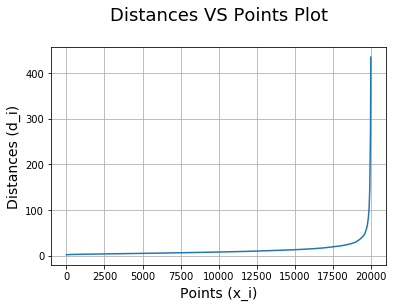

In [13]:
min_points = 2*data.shape[1]

# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

# DBSCAN Implementation

In [15]:
optimal_eps = 30
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)


# Clustering with  epsilon = 40
db2 = dbscan(40, min_points, data)


# Clustering with epsilon = 50
db3 = dbscan(50, min_points, data)


# Clustering with epsilon = 60
db4 = dbscan(60, min_points, data)

Number of clusters for MinPts = 200 and Epsilon = 30.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 40.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 50.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 60.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



# Visualizing The Clusters 

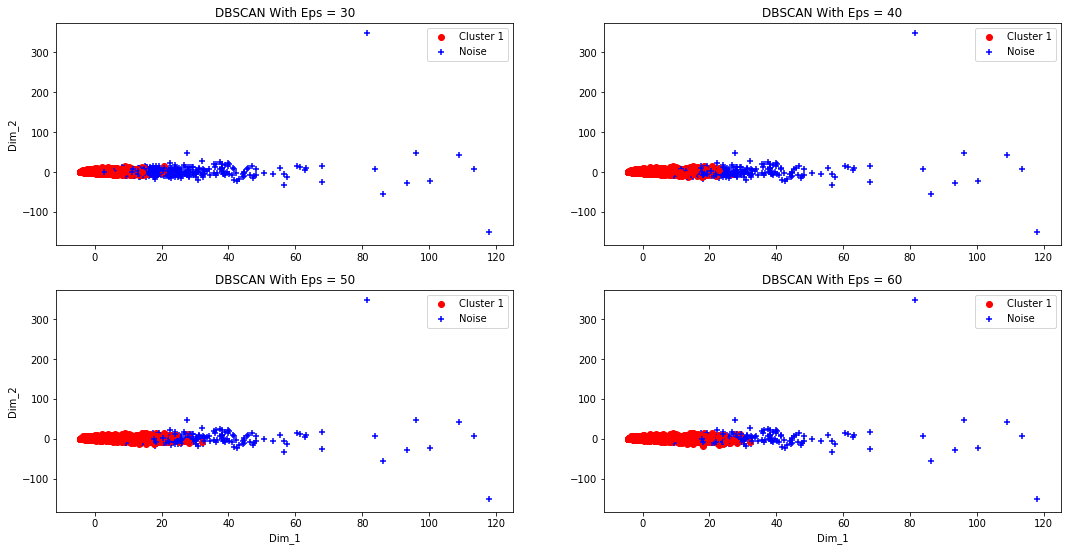

In [17]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2).fit_transform(data)

# Scatter plot for DBSCAN with Eps = 30
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 30')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps = 18
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 40')

# Scatter plot for DBSCAN with Eps = 20
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db3.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 50')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps = 22
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db4.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 60')
plt.xlabel('Dim_1')

plt.show()

# TFIDF

In [18]:
tf_idf_vect = TfidfVectorizer(min_df=10)
data_vec = tf_idf_vect.fit_transform(x)
print("the type of count vectorizer :",type(data_vec))
print("the shape of out text BOW vectorizer : ",data_vec.get_shape())
print("the number of unique words :", data_vec.get_shape()[1])

# Converting sparse matrix to dense matrix
data_dense = data_vec.toarray()

# Standardising the data
data = StandardScaler().fit_transform(data_dense)
svd = TruncatedSVD(n_components=100)
data = svd.fit_transform(data)

the type of count vectorizer : <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer :  (20000, 4066)
the number of unique words : 4066


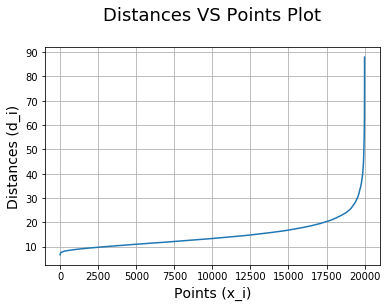

In [19]:
min_points = 2*data.shape[1]

# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

# DBSCAN Implementation

In [22]:
optimal_eps = 16
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)


# Clustering with  epsilon = 19
db2 = dbscan(19, min_points, data)


# Clustering with epsilon = 22
db3 = dbscan(22, min_points, data)


# Clustering with epsilon = 25
db4 = dbscan(25, min_points, data)

Number of clusters for MinPts = 200 and Epsilon = 16.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 19.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 22.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 200 and Epsilon = 25.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



# Visualizing The Clusters :

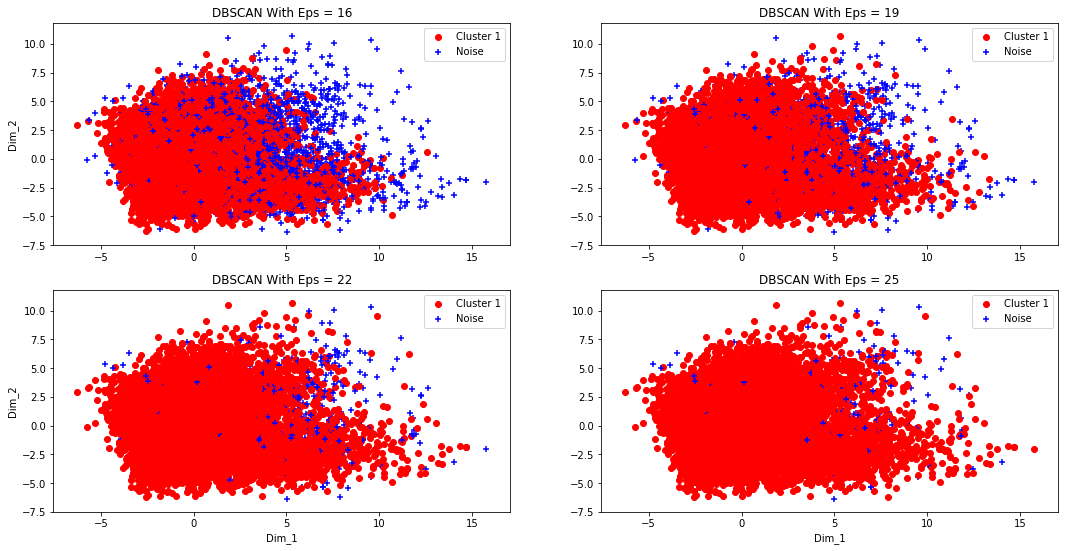

In [23]:
pca_2d = PCA(n_components=2).fit_transform(data)

# Scatter plot for DBSCAN with Eps = 16
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 16')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps = 19
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 19')

# Scatter plot for DBSCAN with Eps = 22
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db3.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 22')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps = 25
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db4.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1,c2], ['Cluster 1','Noise'])  
plt.title('DBSCAN With Eps = 25')
plt.xlabel('Dim_1')

plt.show()

# Word2Vec

In [24]:
sent_x = []
for sent in x :
    sent_x.append(sent.split())
  
    
# Train your own Word2Vec model using your own train text corpus 
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(sent_x,min_count=5,size=100, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

number of words that occured minimum 5 times  6275


# Avg Word2Vec

In [26]:
# compute average word2vec for each review for sent_x .
train_vectors = []; 
for sent in sent_x:
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
    
#Standardising the data
data = StandardScaler().fit_transform(train_vectors)
svd = TruncatedSVD(n_components=90)
data = svd.fit_transform(data)


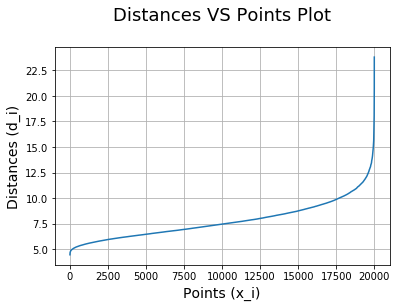

In [27]:
min_points = 2*data.shape[1]

# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

# DBSCAN Implementation

In [28]:
optimal_eps = 8
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)


# Clustering with  epsilon = 9
db2 = dbscan(9, min_points, data)


# Clustering with epsilon = 11
db3 = dbscan(10, min_points, data)


# Clustering with epsilon = 12
db4 = dbscan(11, min_points, data)

Number of clusters for MinPts = 180 and Epsilon = 8.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 9.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 10.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 11.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



# Visualizing The Clusters

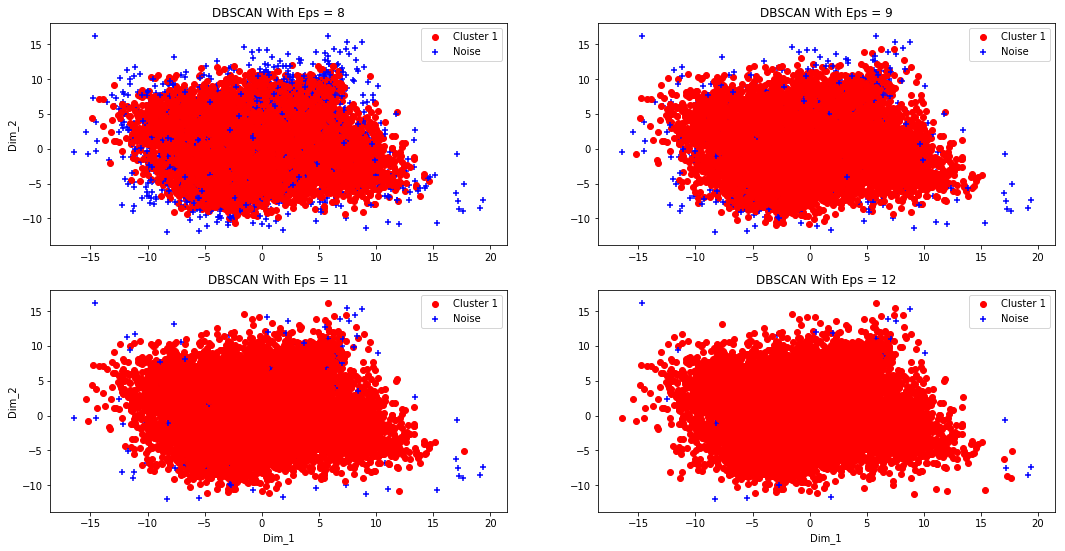

In [29]:
pca_2d = PCA(n_components=2).fit_transform(data)

# Scatter plot for DBSCAN with Eps = 8
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 8')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps = 9
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 9')

# Scatter plot for DBSCAN with Eps = 10
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db3.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 11')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps = 11
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db4.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1,c2], ['Cluster 1','Noise'])  
plt.title('DBSCAN With Eps = 12')
plt.xlabel('Dim_1')

plt.show()

# TFIDF-Word2Vec

In [31]:
tf_idf_vect = TfidfVectorizer()

# final_tf_idf1 is the sparse matrix with row= sentence, col=word and cell_val = tfidf
final_tf_idf1 = tf_idf_vect.fit_transform(x)

# tfidf words/col-names
tfidf_feat = tf_idf_vect.get_feature_names()

# compute TFIDF Weighted Word2Vec for each review for sent_x .
tfidf_vectors = []; 
row=0;
for sent in sent_x: 
    sent_vec = np.zeros(100) 
    weight_sum =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf1[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_vectors.append(sent_vec)
    row += 1 
    
#Standardising the data
data = StandardScaler().fit_transform(tfidf_vectors)
svd = TruncatedSVD(n_components=90)
data = svd.fit_transform(data)

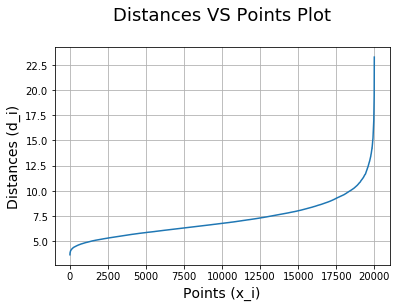

In [32]:
min_points = 2*data.shape[1]

# Computing distances of nth-nearest neighbours
distances = n_neighbour(data,min_points)
sorted_distance = np.sort(distances)
points = [i for i in range(data.shape[0])]

# Draw distances(d_i) VS points(x_i) plot
plt.plot(points, sorted_distance)
plt.xlabel('Points (x_i)',size=14)
plt.ylabel('Distances (d_i)',size=14)
plt.title('Distances VS Points Plot\n',size=18)
plt.grid()
plt.show()

# DBSCAN Implementation

In [33]:
optimal_eps = 8
# Clustering with right epsilon
db1 = dbscan(optimal_eps, min_points, data)


# Clustering with  epsilon = 9
db2 = dbscan(9, min_points, data)


# Clustering with epsilon = 10
db3 = dbscan(10, min_points, data)


# Clustering with epsilon = 11
db4 = dbscan(12, min_points, data)

Number of clusters for MinPts = 180 and Epsilon = 8.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 9.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 10.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}

Number of clusters for MinPts = 180 and Epsilon = 12.000000 is : 2 
Labels(-1 is for Noise) :  {0, -1}



# Visualizing The Clusters

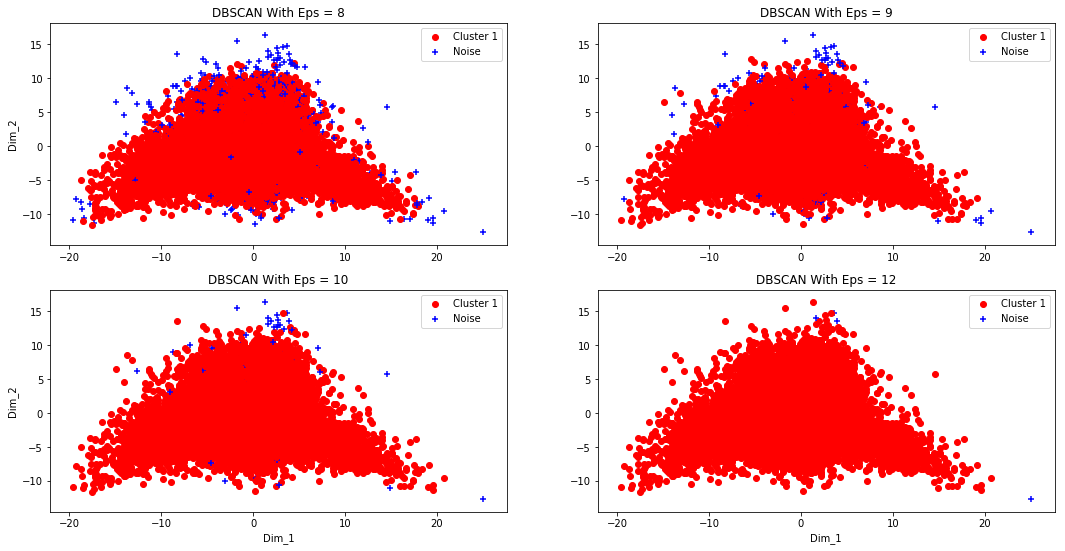

In [35]:
pca_2d = PCA(n_components=2).fit_transform(data)

# Scatter plot for DBSCAN with Eps = 8
plt.figure(figsize=(18,9))
plt.subplot(221)
for i in range(0, pca_2d.shape[0]):
    if db1.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db1.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 8')
plt.ylabel('Dim_2')

# Scatter plot for DBSCAN with Eps = 9
plt.subplot(222)
for i in range(0, pca_2d.shape[0]):
    if db2.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db2.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 9')

# Scatter plot for DBSCAN with Eps = 10
plt.subplot(223)
for i in range(0, pca_2d.shape[0]):
    if db3.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db3.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1, c2], ['Cluster 1', 'Noise'])  
plt.title('DBSCAN With Eps = 10')
plt.ylabel('Dim_2')
plt.xlabel('Dim_1')

# Scatter plot for DBSCAN with Eps = 12
plt.subplot(224)
for i in range(0, pca_2d.shape[0]):
    if db4.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='o')
    elif db4.labels_[i] == -1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
plt.legend([c1,c2], ['Cluster 1','Noise'])  
plt.title('DBSCAN With Eps = 12')
plt.xlabel('Dim_1')

plt.show()